<a href="https://colab.research.google.com/github/bastiansosa/procesamiento-digital/blob/main/procesamiento_digital12().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import data 
import matplotlib.pylab as plt
import skimage.io as io

MEJORAR EL CONTRASTE DE LA IMAGEN.
ALGUNA TECNICA: EQUALIZE_HIST, LOG(NORMALIZAR PIXELES), GAMMA

In [4]:
img = io.imread("https://raw.githubusercontent.com/jorgevergara/PDI/main/chest_xray_image.png?raw=True",as_gray=True)

(array([2.0508e+04, 2.8700e+02, 1.8100e+02, 1.6400e+02, 1.6800e+02,
        1.3500e+02, 1.6500e+02, 1.5500e+02, 1.6000e+02, 1.7200e+02,
        1.5500e+02, 1.6700e+02, 1.8800e+02, 1.7900e+02, 1.7000e+02,
        2.1000e+02, 2.1000e+02, 2.2500e+02, 2.9400e+02, 3.0100e+02,
        3.5600e+02, 3.5600e+02, 3.9900e+02, 4.1800e+02, 4.9900e+02,
        4.8600e+02, 5.2500e+02, 5.0400e+02, 5.3500e+02, 5.3000e+02,
        5.4300e+02, 5.6000e+02, 5.1900e+02, 5.5700e+02, 5.8400e+02,
        5.1600e+02, 5.8500e+02, 4.8500e+02, 4.4300e+02, 4.5700e+02,
        4.1600e+02, 4.3000e+02, 4.6300e+02, 4.3900e+02, 4.8600e+02,
        5.3400e+02, 5.5900e+02, 5.9100e+02, 5.6000e+02, 6.2200e+02,
        6.1300e+02, 5.9900e+02, 7.3000e+02, 7.1100e+02, 8.5500e+02,
        8.4300e+02, 9.2100e+02, 9.5800e+02, 1.1200e+03, 1.3850e+03,
        1.5600e+03, 1.8960e+03, 2.1010e+03, 2.2160e+03, 2.5410e+03,
        2.8580e+03, 3.2570e+03, 3.3830e+03, 3.7620e+03, 4.2070e+03,
        4.5570e+03, 5.3000e+03, 5.6960e+03, 6.03

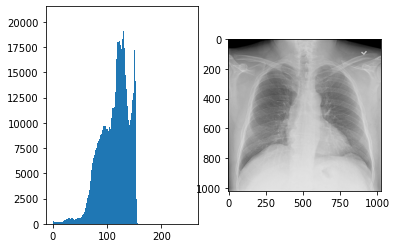

In [86]:
fig,ax = plt.subplots(1,2)
ax[1].imshow(img,cmap='gray')
ax[0].hist(img.ravel(),bins=range(0,256))

In [87]:
# y,x = np.histogram(im.ravel(),bins=range(0,256))
# plt.figure()
# plt.bar(x[:-1],y)

In [73]:
from skimage.exposure import (histogram,adjust_gamma,adjust_log,equalize_hist)

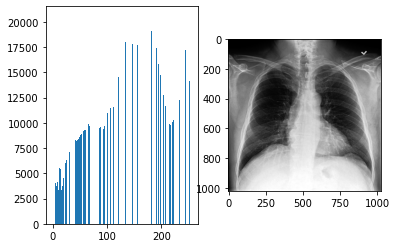

In [91]:
img_eq = equalize_hist(img)
fig,ax = plt.subplots(1,2)
ax[0].hist(img_eq.ravel()*255,bins=range(0,256)) # multiplicar por 255 porque los valores son 1
ax[1].imshow(img_eq,cmap='gray')

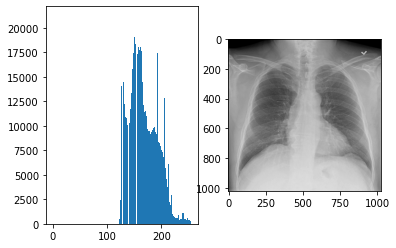

In [92]:
img_gm = adjust_gamma(img,gamma=1.3)
fig,ax = plt.subplots(1,2)
ax[0].hist(img_gm.ravel()*255,bins=range(0,256));
ax[1].imshow(img_gm,cmap='gray')

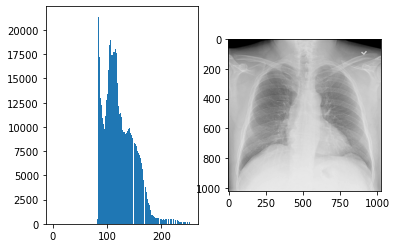

In [93]:
img_lg= adjust_log(img)
fig,ax = plt.subplots(1,2)
ax[0].hist(img_lg.ravel()*255,bins=range(0,256));
ax[1].imshow(img_lg,cmap='gray')

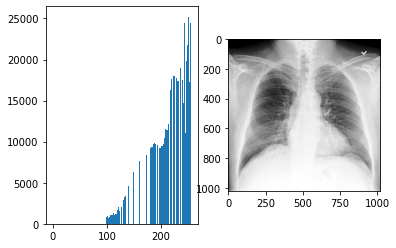

In [94]:
im_ss = adjust_log(adjust_gamma(equalize_hist(img),0.3))
fig,ax = plt.subplots(1,2)
ax[1].imshow(im_ss,cmap='gray')
ax[0].hist(im_ss.ravel()*255,bins=range(0,256));

PROCESAMIENTO MORFOLOGICO DE LA IMAGEN 


In [74]:
from skimage.morphology import (disk, square, erosion,dilation,closing,opening,area_closing,area_opening)

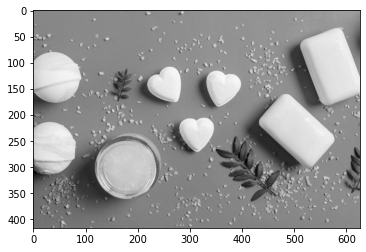

In [77]:
img2 = io.imread("https://raw.githubusercontent.com/jorgevergara/PDI/main/soap_image.jpg", as_gray=True)
plt.imshow(img2,cmap="gray")

In [78]:
img2.max()

0.9622513725490196

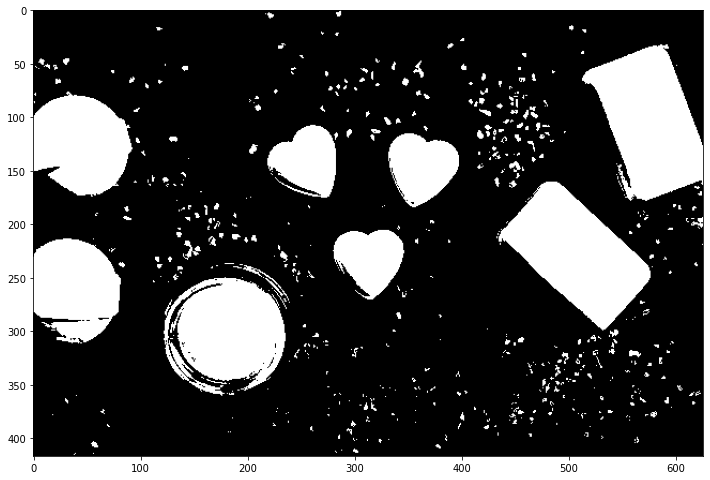

In [80]:
img_th = img2>0.7 #imagen binarizada
plt.figure(figsize=(12,12))
plt.imshow(img_th, cmap="gray")

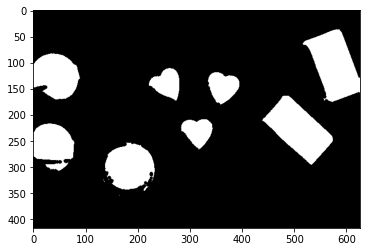

In [85]:
#eliminar los granos con una erosion con 5x5
#primero dilatacion depsues erosion = opening
img_p1 = erosion(img_th,disk(3))
plt.imshow(img_p1,cmap="gray")

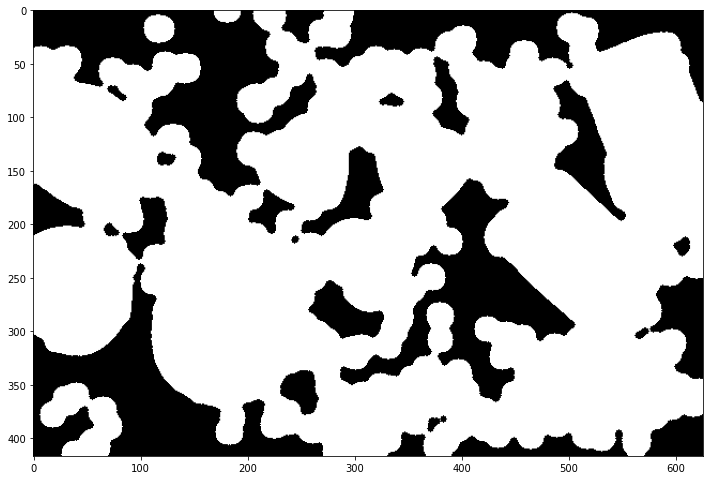

In [95]:
im_p1 = erosion(dilation(img_th,disk(15)),disk(3)) #una forma de unir las figuras de la imagen 
plt.figure(figsize=(12,12))
plt.imshow(im_p1,cmap='gray')

Filtrado de imagen


In [96]:
from skimage.filters import (gaussian, sobel, median, inverse)

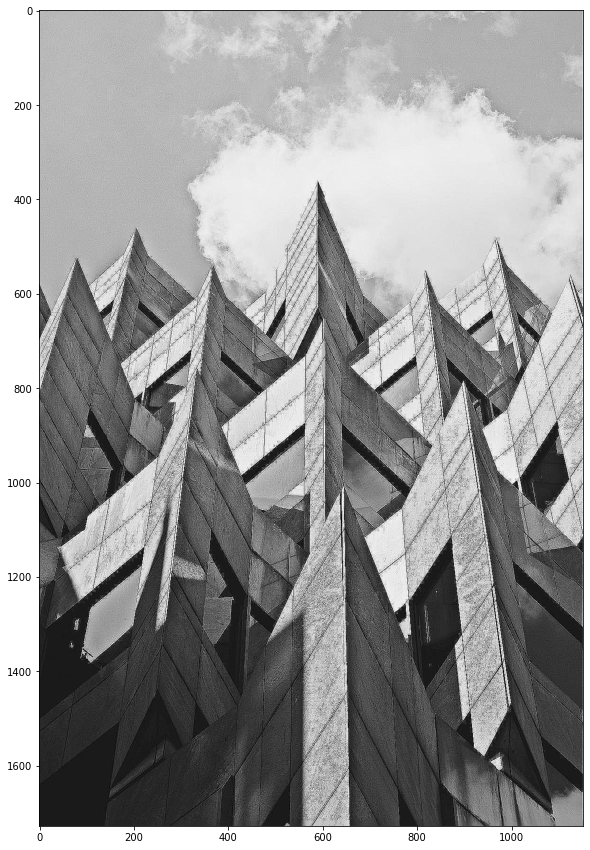

In [97]:
img3 = io.imread('https://raw.githubusercontent.com/jorgevergara/PDI/main/building_image.jpg', as_gray=True)
plt.figure(figsize=(15, 15))
plt.imshow(img3,cmap='gray')

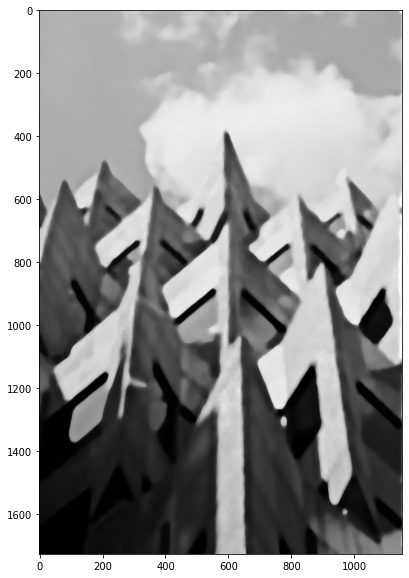

In [98]:
img_md = median(img3,disk(15))
plt.figure(figsize=(10, 10))
plt.imshow(img_md,cmap='gray')

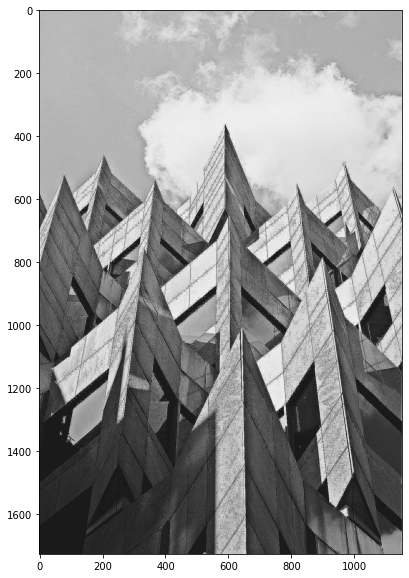

In [99]:
im_gs = gaussian(img3,0.2)
plt.figure(figsize=(10, 10))
plt.imshow(im_gs,cmap='gray')

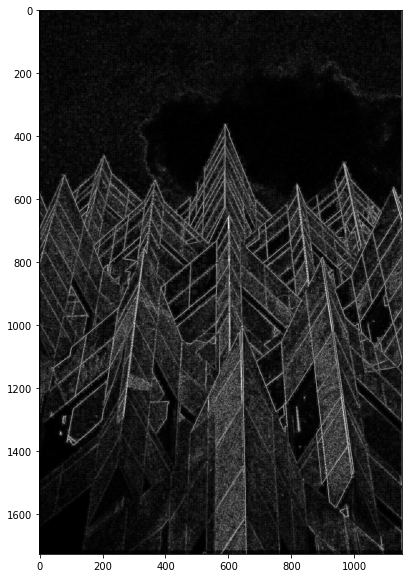

In [100]:
im_sb = sobel(img3)
plt.figure(figsize=(10, 10))
plt.imshow(im_sb,cmap='gray')

In [102]:
#normalizar una imagen
imxx = np.log(0.1+img3)
imxx_min = imxx.min()
imxx_max = imxx.max()
imxx_normalizada_0_1 = (imxx - imxx_min)/(imxx_max-imxx_min) #normalizada entre 0 y 1
imxx_normalizada_0_255 = (imxx_normalizada_0_1*255).astype(int) #normalizada entre 0 y 255